# 5. Dexplot

Dexplot is a package that I created to further simplify Seaborn. You may be thinking that Seaborn is simple enough, but there is quite a bit of replication and several things that can be improved. For instance, there are about 5 different functions that create scatterplots (`relplot`, `scatterplot`, `lmplot`, `regplot` and `jointplot`). There are only minor differences between these plots, so a single scatter plot function could suffice.

A few more things that could be improved in Seaborn:
* There is no easy way to create relative frequency plots
* No way to control the size of the figure and several other matplotlib properties without actually using matplotlib itself
* No way to use a strings for functions when grouping


## The goal of Dexplot is simplicity

There are currently only three functions available in Dexplot - `aggplot`, `jointplot`, and `heatmap`. The `aggplot` function is similar to `catplot` in Seaborn. I named it `aggplot` because it is used to aggregate data (which is what `catplot` does). Instead of `x` and `y`, `aggplot` uses `agg` and `groupby`.

The variable being aggregated gets passed to `agg` and the variable doing the grouping gets passed to `groupby`. It is no different than calling a `groupby` method on a DataFrame

## Install with `pip`

You will need to install by running the `pip install dexplot` or perhaps `pip3 install dexplot`.

In [3]:
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import dexplot as dxp
%matplotlib inline

In [4]:
oly = pd.read_csv('../data/oly.csv')
oly.info()
oly.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


AttributeError: 'SubplotSpec' object has no attribute 'get_rows_columns'

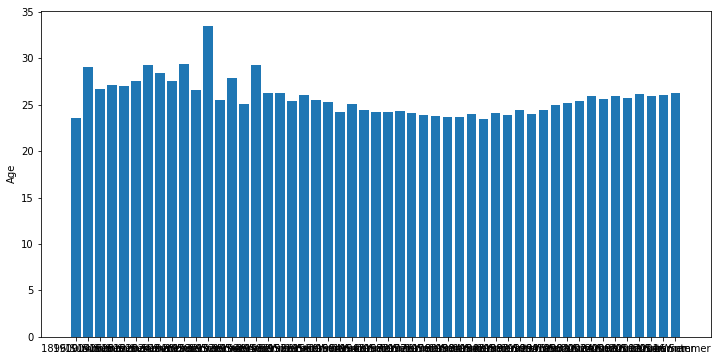

In [5]:
dxp.aggplot(agg='Age', groupby='Games', data=oly)

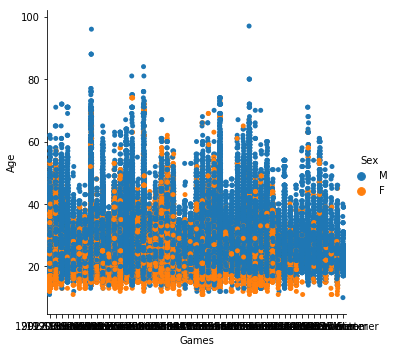

In [8]:
sns.catplot(x='Games', y='Age', hue='Sex', data=oly, kind='strip')

In [ ]:
emp = pd.read_csv('../data/employee.csv')
emp.head()

## Bar plots
Bar plots are the default plot type for `aggplot`. Also by default, the mean is taken.

In [ ]:
dxp.aggplot(agg='salary', groupby='race', data=emp)

### `hue` works the same way
Notice how you can change the figure size without resorting to matplotlib.

In [ ]:
dxp.aggplot(agg='salary', groupby='race', data=emp, hue='gender', figsize=(12, 4))

### Stacked bar plots
Stacked bar plots can be misleading, but they are available in Dexplot.

In [ ]:
dxp.aggplot(agg='salary', groupby='race', data=emp, hue='gender', stacked=True)

### Choose the aggregation function with a string

In [ ]:
dxp.aggplot(agg='salary', groupby='race', data=emp, hue='gender', aggfunc='max')

Read more about dexplot on [Github](https://github.com/dexplo/dexplot)